# Group 1: Digital Image Representation and Basic Enhancement Techniques

**DCIT407 - Image Processing**

**Project Comprehensive Notebook**

This notebook contains all implementations for Group 1's semester project covering:
1. Grayscale vs Color Images
2. Image Resolution
3. Intensity Quantization
4. Simple Enhancement Techniques (Brightness, Contrast, Filtering)

---

---

# Part 1: Grayscale vs Color Images

Understanding the difference between grayscale (single-channel) and color (multi-channel) image representations, and how to convert between them.


<a href="https://colab.research.google.com/github/AgboGabriel/Group_1_Enhancement_Techniques/blob/main/GrayScale_Vs_Color_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow



In [10]:
color_image=cv2.imread("/content/cat-with-blue-eyes.jpg")

In [20]:
def process_and_display_image(image_path):

    # Load the image in color
    color_image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if color_image is None:
        print(f"Error: Could not load image from {image_path}. Please make sure the file exists and the path is correct.")
        return

    # Convert the image to grayscale
    image_gray = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    # Convert BGR (OpenCV default) to RGB for Matplotlib display
    image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

    # Create a single figure for both plots
    plt.figure(figsize=(12, 6))

    # Plot the original color image
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    plt.imshow(image_rgb)
    plt.title(f"Original Color Image: {image_path.split('/')[-1]}") # Extract filename for title
    plt.axis("off")

    # Plot the gray_scale equivalent
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    plt.imshow(image_gray, cmap="gray")
    plt.title(f"Grayscale Image: {image_path.split('/')[-1]}")
    plt.axis("off")

    plt.show()

Now, you can simply call this function for each of your images. For example, if you had `cat-with-blue-eyes.jpg`, `dog.jpg`, `bird.png`, and `fish.bmp` (you would need to upload these first), you would call the function like this:

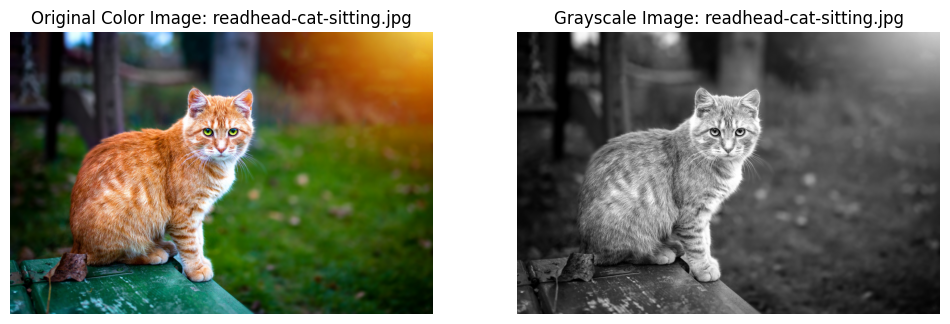

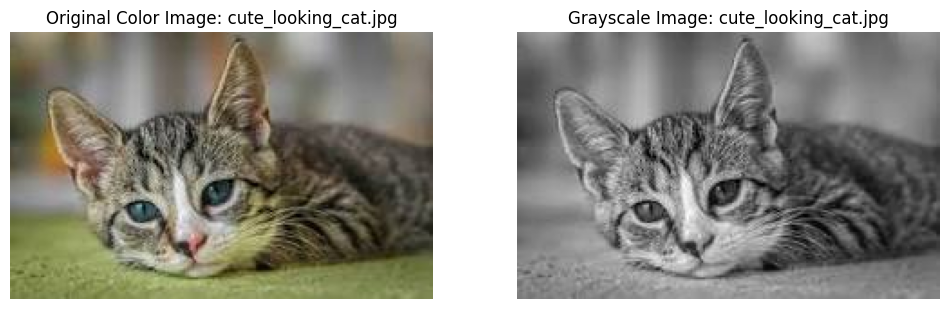

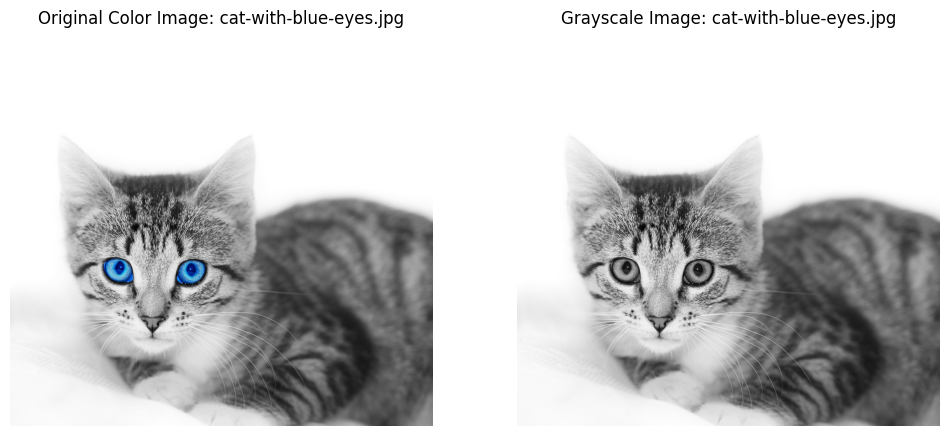

In [21]:

process_and_display_image("/content/readhead-cat-sitting.jpg")
process_and_display_image("/content/cute_looking_cat.jpg")
process_and_display_image("/content/cat-with-blue-eyes.jpg")

---

# Part 2: Image Resolution

Exploring spatial resolution by downsampling and upsampling images to different resolutions (64×64, 256×256, 512×512) and comparing interpolation methods.


Uploading Images

In [4]:
from google.colab import files
uploaded = files.upload()

Saving resolution.zip to resolution.zip


Extracting the ZIP File

In [7]:
import zipfile
import os

zip_path = '/content/resolution.zip'
extract_path = '/content/resolution'

# Extract images
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

['resoImages']

In [8]:
os.listdir('/content/resolution/resoImages')

['image5.tiff', 'image3.tiff', 'image1.jpg', 'image4.tiff', 'image2.jpg']

Checking Extracted Files

In [9]:
image_folder = '/content/resolution/resoImages'
os.listdir(image_folder)

['image5.tiff', 'image3.tiff', 'image1.jpg', 'image4.tiff', 'image2.jpg']

Loading an Image & Printing Resolution

image1.jpg → 150x150, Channels: 3


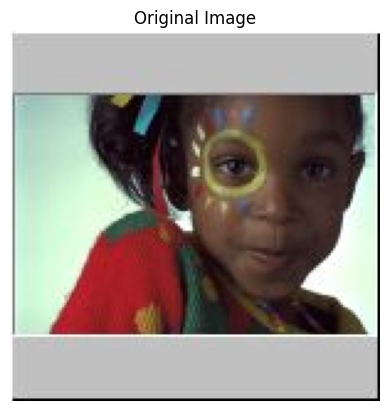

In [20]:
import cv2
import matplotlib.pyplot as plt

# Load an image of index 2
image_name = os.listdir(image_folder)[2]  # pick first image automatically
image_path = os.path.join(image_folder, image_name)

# Convert BGR to RGB for display
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Print image resolution
h, w, c = img.shape
print(f"{image_name} → {w}x{h}, Channels: {c}")

# Display original image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

Resolution Reduction

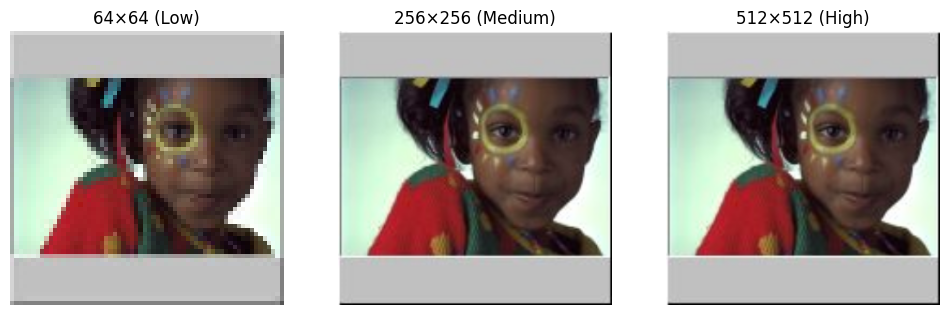

In [21]:
# Resize image to different resolutions
low = cv2.resize(img_rgb, (64, 64))
medium = cv2.resize(img_rgb, (256, 256))
high = cv2.resize(img_rgb, (512, 512))

# Resize image to different resolutions
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(low)
plt.title("64×64 (Low)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(medium)
plt.title("256×256 (Medium)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(high)
plt.title("512×512 (High)")
plt.axis('off')

plt.show()

Upsampling Low Resolution

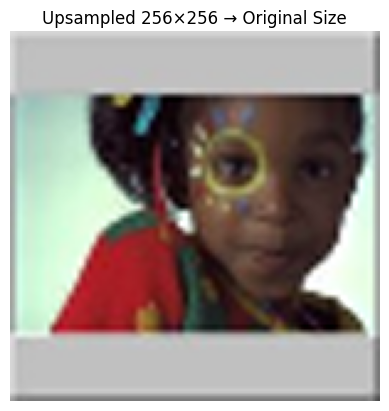

In [22]:
upsampled = cv2.resize(low, (w, h), interpolation=cv2.INTER_CUBIC)

plt.imshow(upsampled)
plt.title("Upsampled 64×64 → Original Size")
plt.axis('off')
plt.show()

Processing All Images

Image: image5.tiff
Resolution: 1024x1024, Channels: 3


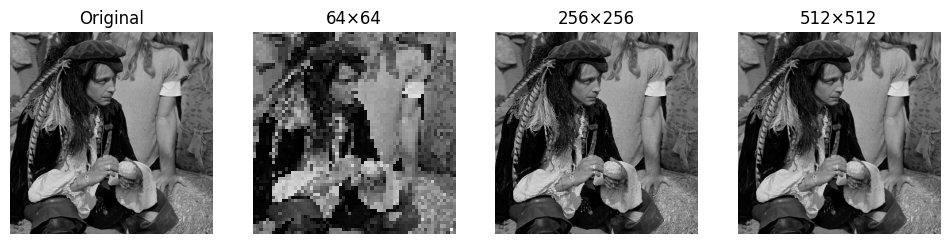

Image: image3.tiff
Resolution: 256x256, Channels: 3


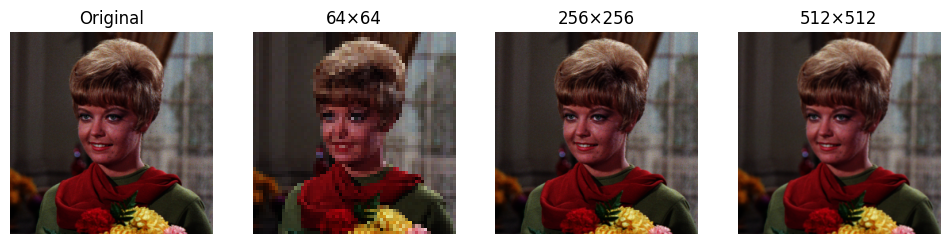

Image: image1.jpg
Resolution: 150x150, Channels: 3


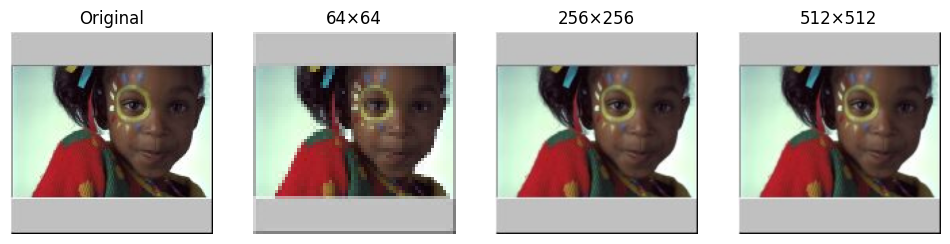

Image: image4.tiff
Resolution: 512x512, Channels: 3


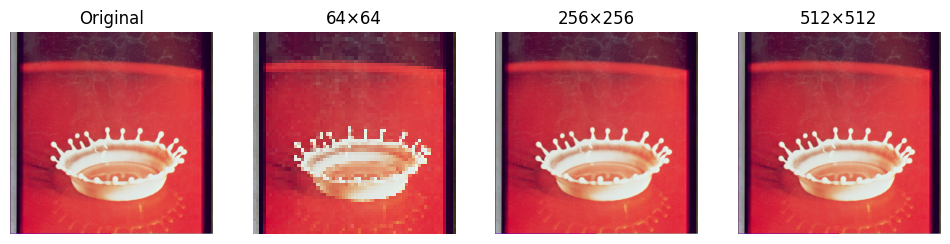

Image: image2.jpg
Resolution: 181x148, Channels: 3


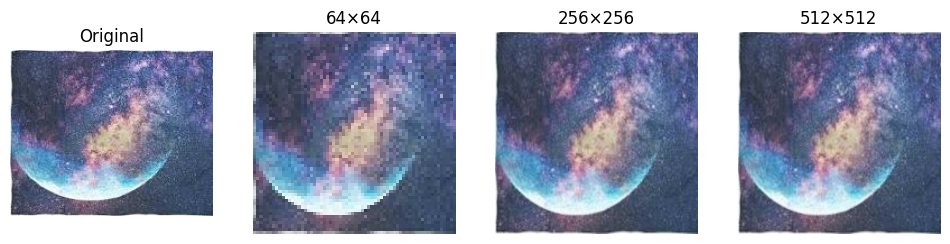

In [17]:
image_files = os.listdir(image_folder)

for image_name in image_files:
    print("="*40)
    print(f"Image: {image_name}")

    image_path = os.path.join(image_folder, image_name)
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, c = img.shape
    print(f"Resolution: {w}x{h}, Channels: {c}")

    low = cv2.resize(img_rgb, (64, 64))
    medium = cv2.resize(img_rgb, (256, 256))
    high = cv2.resize(img_rgb, (512, 512))

    plt.figure(figsize=(12,4))
    plt.subplot(1,4,1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(low)
    plt.title("64×64")
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(medium)
    plt.title("256×256")
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(high)
    plt.title("512×512")
    plt.axis('off')

    plt.show()


---

# Part 3: Image Quantization

Demonstrating intensity quantization by reducing the number of gray levels/colors from 256 to fewer levels (16, 8, 4). Comparing floor quantization and nearest-level quantization methods.


# **Image Quantization**                
Image quantization is the process of mapping a large set of continuous or discrete intensity values to a smaller, finite set of intensity levels. It deals with intensity resolution i.e how many grey levels or colors are used to represent pixel values. In simple terms, quantization determines how accurately pixel values are represented.

Converts continuous intensity values into discrete levels.             
Controls the number of grey levels or colors.               
More levels means smoother intensity transitions.                    
Fewer levels means visible banding and distortion.                     
Quantization introduces quantization error.

# Practical Implementation

In [73]:

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# **Floor Quantization**

Maps each pixel down to the lowest intensity level in its bin, simpler to implement but slightly less accurate.

Formula: output = (pixel // step) × step

pixel — the original intensity value (0–255).                  
step — the bin size, calculated as 256 // levels.                   
// — integer division, always rounds down.                         
levels — the number of output intensity levels.

In [74]:
 #Upload Image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving apple.png to apple (4).png


In [75]:
# Load color image
color_img = cv2.imread(filename)

# Convert BGR → RGB for proper display
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)

In [91]:
#Quantization Function

# reduces the number of intensity levels in an image
def quantize_image(image, levels):
    step = 256 // levels
    return (image // step) * step



In [92]:
# Apply Grayscale Quantization
# --------------------------
levels_list = [16, 8, 4]  # Levels to test

quantized_gray = [quantize_image(gray_img, L) for L in levels_list]

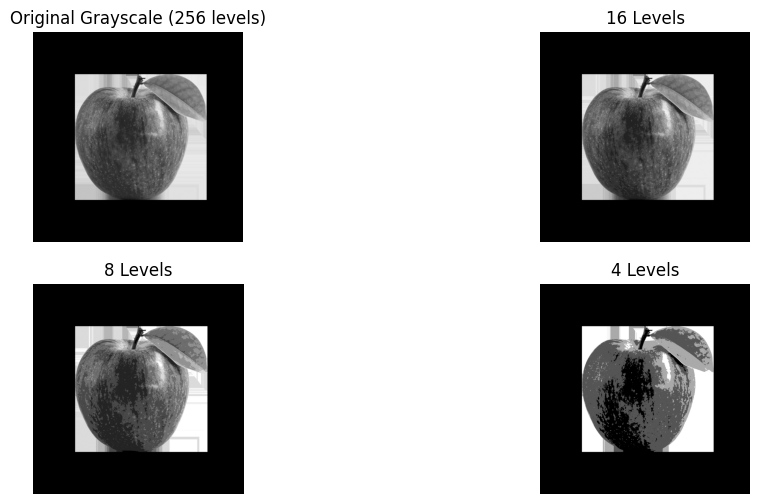

In [93]:
# Display grayscale comparison
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale (256 levels)")
plt.axis('off')

for i, L in enumerate(levels_list):
    plt.subplot(2, 2, i+2)
    plt.imshow(quantized_gray[i], cmap='gray')
    plt.title(f"{L} Levels")
    plt.axis('off')

plt.show()

In [95]:
uploaded = files.upload()  # Upload your new color image
new_filename = list(uploaded.keys())[0]


Saving yellow_green_fruit.jpg to yellow_green_fruit (6).jpg


# **Nearest-Level Quantization**

Maps each pixel to the closest available intensity level by rounding, giving a more accurate representation of the original image.

Formula: q = round((levels - 1) × pixel / 255) → output = q × 255 / (levels - 1)

pixel — the original intensity value (0–255).        
levels — the number of output intensity levels.                                       
q — the quantized level index.                                
255 — the maximum pixel intensity

In [96]:
# Load the new color image
color_img = cv2.imread(new_filename)
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB


In [97]:
#Quantization Function

def quantize_coloured_image(image, levels):
    L = 256
    q = np.round((levels - 1) * image / (L - 1))
    return (q * (L - 1) / (levels - 1)).astype(np.uint8)

In [98]:
 #Apply Color Quantization

levels_list = [4, 8, 16]
quantized_color = [quantize_coloured_image(color_img, L) for L in levels_list]

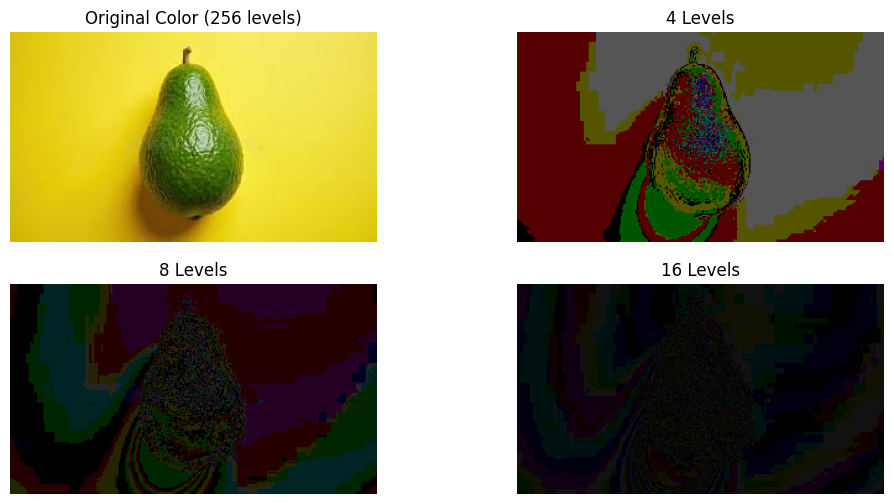

In [99]:
# Display comparison
# --------------------------
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(color_img)
plt.title("Original Color (256 levels)")
plt.axis('off')

for i, L in enumerate(levels_list):
    plt.subplot(2, 2, i+2)
    plt.imshow(quantized_color[i])
    plt.title(f"{L} Levels")
    plt.axis('off')

plt.show()

---

# Part 4: Simple Image Enhancement Techniques

Implementing basic enhancement methods including brightness adjustment, contrast adjustment, and spatial filtering (mean filter) to improve image visual quality.


<a href="https://colab.research.google.com/github/JohnsonWalker-cmd/Group_1_Enhancement_Techniques/blob/main/Copy_of_Simple_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Image Enhancement Techniques

Image enhancement is the process of improving the quality and appearance of an image.

# Why do we enhance images ?

It can be used to correct flaws or defects in an image, or to simply make an image more visually appealing.

# Some of the simple techniques are:



1.   Brightness adjustment
2.   Contrast adjustment
3. Simple filtering



## Brighness adjustment

Brightness adjustment is a point operation that changes the intensity of every pixel in an image by a constant value.

Mathematical Equation

$$s = r + b$$

s: The output pixel intensity

r: The input pixel intensity.

b: The brightness constant.


If b > 0, the image becomes brighter.

If b < 0, the image becomes darker.

## Practical Implementation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
img = cv2.imread("/content/4.1.04.tiff")

In [ ]:
# alpha=1.0 keeps contrast the same; beta is the brightness shift

bright_img = cv2.convertScaleAbs(img, beta=60 , alpha=1.0)

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bright_rgb = cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB)

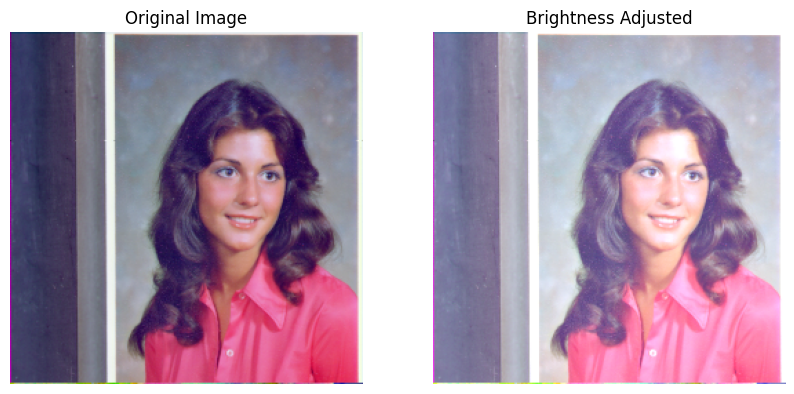

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bright_rgb)
plt.title("Brightness Adjusted")
plt.axis("off")

#plt.tight_layout()
plt.show()

# Contrast Adjustment

Contrast controls the difference between dark and light areas.

Mathematical Equation

  s=αr+β

  Where:


α → contrast control


β → brightness control


If α > 1 → contrast increases

If 0 < α < 1 → contrast decreases

In [ ]:
contrast_img = cv2.convertScaleAbs(img, alpha=1.5, beta=0)

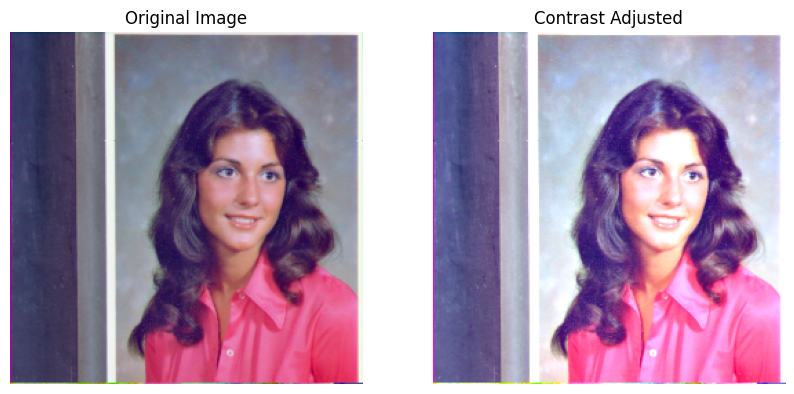

In [ ]:
contrast_rgb = cv2.cvtColor(contrast_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(contrast_rgb)
plt.title("Contrast Adjusted")
plt.axis("off")

#plt.tight_layout()
plt.show()


# Filtering

Filtering is essentially the process of "averaging" pixels to reduce noise and soften sharp transitions.


In a Mean Filter (also called a Box Filter), each pixel is replaced by the average value of its neighbors. This "blurs" the image, which helps hide graininess or small imperfections.

In [ ]:
# The kernel size (5,5) determines the blur strength.
blur = cv2.blur(img, (5,5))
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

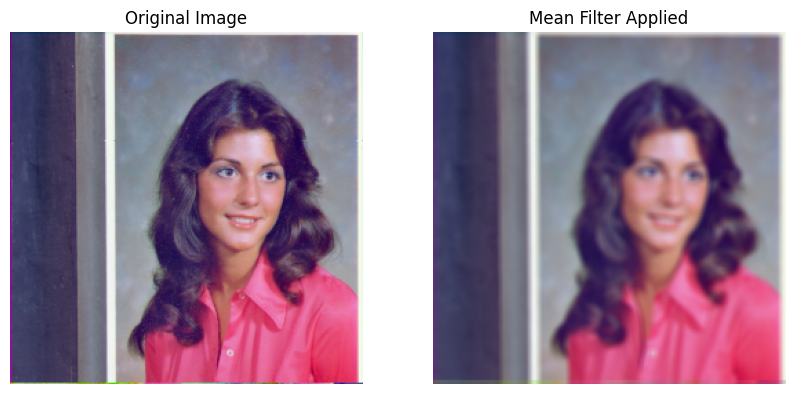

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blur_rgb)
plt.title("Mean Filter Applied")
plt.axis("off")

#plt.tight_layout()
plt.show()

---

# Project Complete

**Group 1 - DCIT407 Image Processing**

This comprehensive notebook demonstrates all fundamental image processing techniques covered in our semester project:
- Digital image representation (grayscale vs color)
- Spatial resolution manipulation
- Intensity quantization
- Basic enhancement techniques

For detailed theory and documentation, see the README.md file in the repository.